In [15]:
from qiskit import *
from qiskit.visualization import plot_histogram, circuit_drawer


In [16]:
#Create Quantum Circuit with 3 qubits
alice = QuantumRegister(1, name = "Alice")
bob = ClassicalRegister(2, name = "Bob")
qc = QuantumCircuit(3, 3)

In [17]:
#Define the initial state to be teleported(Alice Qubit)
initial_state = [0, 1]

In [19]:
qc.initialize(initial_state, 0)

In [20]:
#Create entanglemetn betweet Alice's and Bob's qubit
qc.h(1)
qc.cx(1, 2)

In [21]:
# Perform a Bell measurement on Alice's qubit and the entangled qubit
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])

In [22]:
# Apply corrections to Bob's qubit based on classical measurement outcomes
qc.z(2).c_if(0, 1) # If Alice's result is 1, apply Z gate
qc.x(2).c_if(0, 2) # If Alice's result is 2, apply X gate

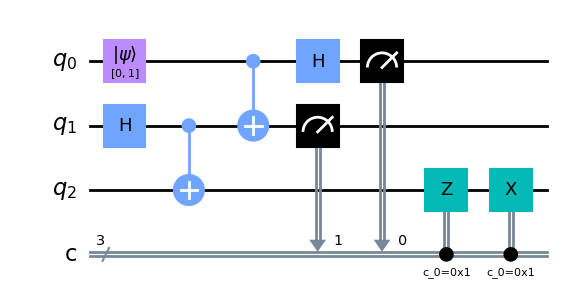

In [28]:
#Visualise circuit
# print(qc)
circuit_drawer(qc, output='mpl')
# qc.draw()

In [24]:
#Simulate the teleportation
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts()

In [25]:
#print the counts
print ("Original Counts :", counts)

Original Counts : {'010': 262, '000': 240, '011': 274, '001': 248}


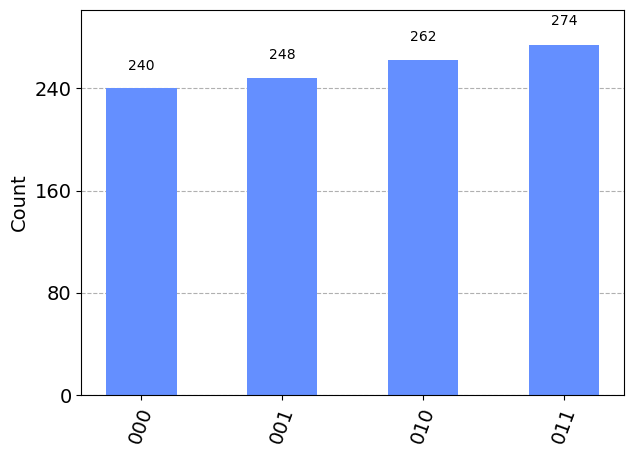

In [26]:
#Plot histogram
plot_histogram(counts)